In [1]:
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.4.2 scikit-learn==1.2.dev0 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [3]:
import sys
print(sys.version)
print(sys.executable)

3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
/share/apps/anaconda/3-2021.11/bin/python


In [4]:
import scipy
print(scipy.__version__)

1.7.3


In [5]:
# Import the external processed single-cell data (https://figshare.com/articles/dataset/Processed_files_to_use_with_scanpy_/8273102)
adata = sc.read("tabula-muris-senis-droplet-processed-official-annotations.h5ad")
adata

/share/home/yangxiujia/.local/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/share/home/yangxiujia/.local/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 245389 × 20138
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'leiden', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'tissue_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [6]:
# Check the metadata
adata.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
AAACCTGCAGGGTACA-1-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACCTGCAGGGTACA,keratinocyte,NA,filiform,droplet,24-M-60,2107.0,male,nan,Tongue,Tongue,5482.0,5,8
AAACCTGCAGTAAGCG-1-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACCTGCAGTAAGCG,keratinocyte,NA,suprabasal,droplet,24-M-60,3481.0,male,nan,Tongue,Tongue,21855.0,19,15
AAACCTGTCATTATCC-1-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACCTGTCATTATCC,keratinocyte,NA,suprabasal,droplet,24-M-60,2599.0,male,nan,Tongue,Tongue,10943.0,19,15
AAACGGGGTACAGTGG-1-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACGGGGTACAGTGG,keratinocyte,NA,suprabasal differentiating,droplet,24-M-60,3468.0,male,nan,Tongue,Tongue,20665.0,12,11
AAACGGGGTCTTCTCG-1-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACGGGGTCTTCTCG,keratinocyte,NA,suprabasal differentiating,droplet,24-M-60,3189.0,male,nan,Tongue,Tongue,12925.0,5,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_15_TTTGTCAGTACATGTC-1,3m,10X_P8_15_TTTGTCAGTACATGTC,basal epithelial cell of tracheobronchial tree,CL:0000066,nan,droplet,3-M-7/8,NaN,male,nan,Trachea,Trachea,5000.0,51,59
10X_P8_15_TTTGTCAGTGCGCTTG-1,3m,10X_P8_15_TTTGTCAGTGCGCTTG,mesenchymal progenitor cell,CL:0008019,nan,droplet,3-M-7/8,NaN,male,nan,Trachea,Trachea,5984.0,11,33
10X_P8_15_TTTGTCAGTTGTCGCG-1,3m,10X_P8_15_TTTGTCAGTTGTCGCG,endothelial cell,CL:0000115,nan,droplet,3-M-7/8,NaN,male,nan,Trachea,Trachea,6507.0,40,32


In [7]:
# Check the age groups
adata.obs.age.value_counts()

30m    55674
3m     45602
18m    44645
24m    37660
21m    35828
1m     25980
Name: age, dtype: int64

In [8]:
# Check the cell types
adata.obs.cell_ontology_class.value_counts()

B cell                      30720
mesenchymal stem cell       13037
granulocyte                 12596
basal cell of epidermis     11431
T cell                      11416
                            ...  
pancreatic stellate cell       21
club cell of bronchiole        15
lung neuroendocrine cell        4
kidney cell                     3
duct epithelial cell            2
Name: cell_ontology_class, Length: 123, dtype: int64

the obs value 'cell_ontology_class' has more than 103 categories. Uniform 'grey' color will be used for all categories.


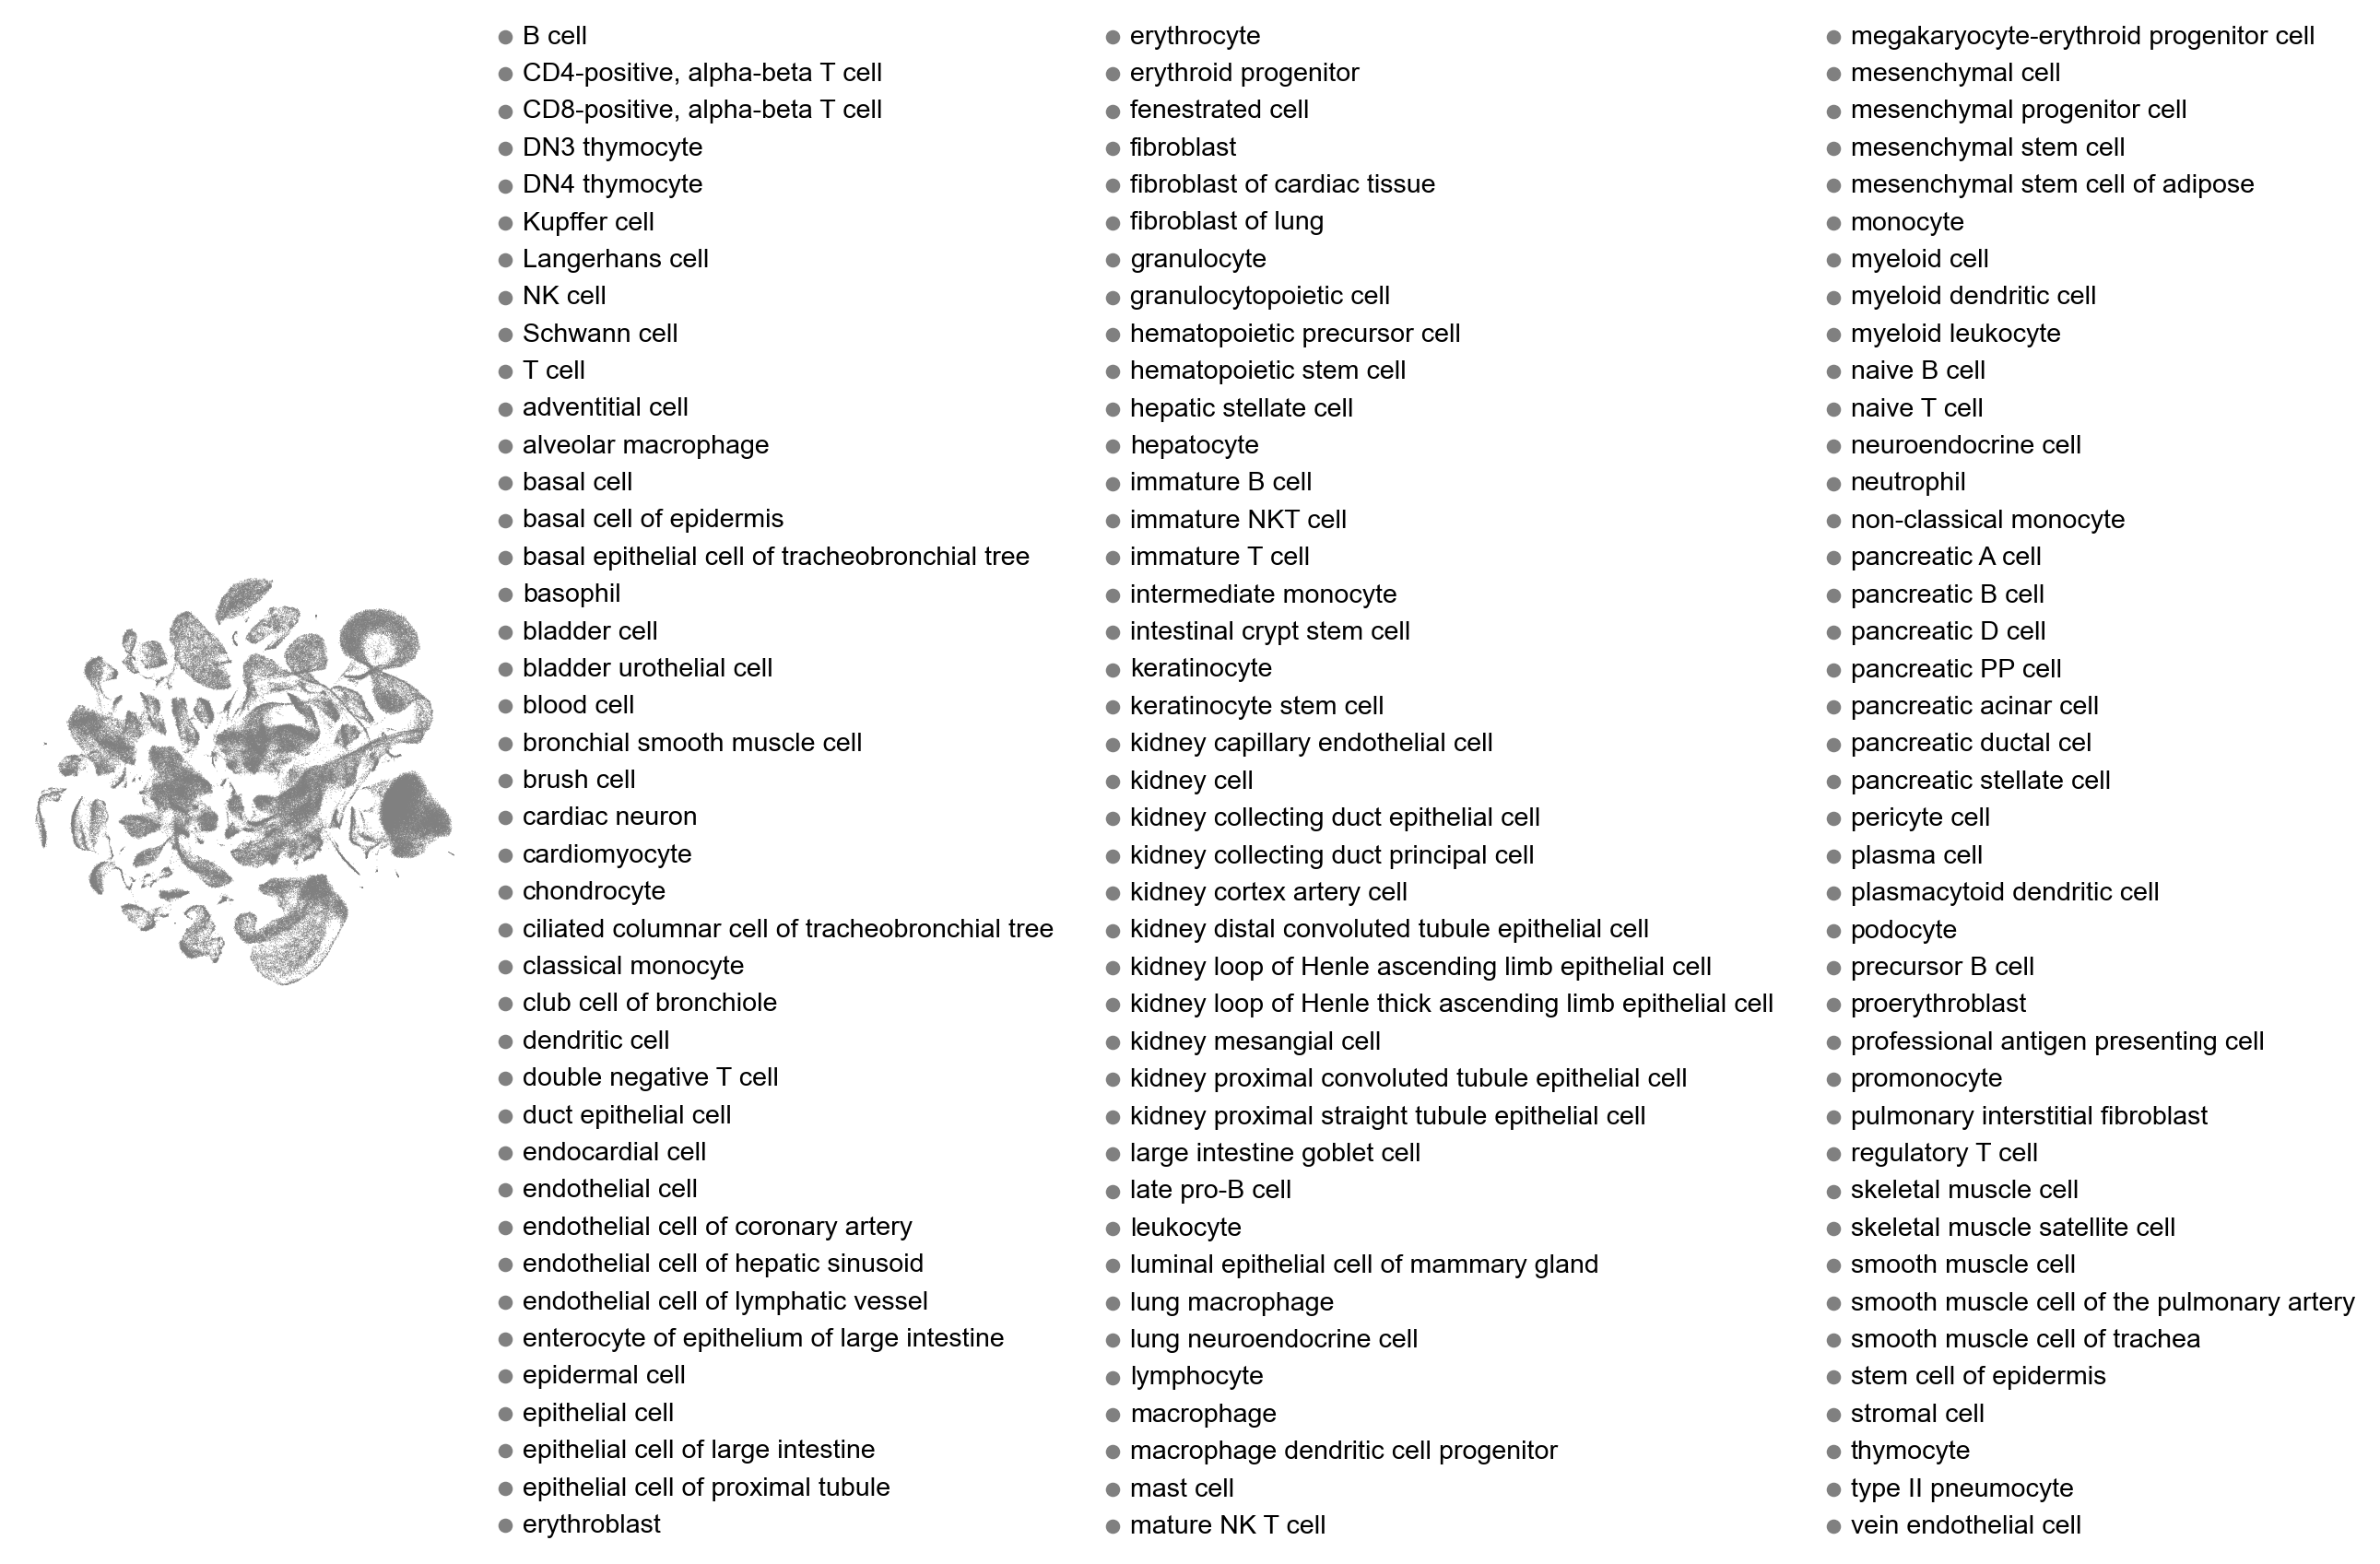

In [9]:
# Visualize the cell clusters in the dimensionality reduction space
sc.pl.umap(
    adata, color="cell_ontology_class", title="", frameon=False
)

In [ ]:
# Calculate the expression levels of genes of interest

adata.var["C1qa"] = (adata.var_names=="C1qa")
adata.var["C1qb"] = (adata.var_names=="C1qb")
adata.var["C1qc"] = (adata.var_names=="C1qc")
adata.var["S100a8"] = (adata.var_names=="S100a8")
adata.var["S100a9"] = (adata.var_names=="S100a9")

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["C1qa", "C1qb", "C1qc", "S100a8", "S100a9"], inplace=True, log1p=False,
)
adata.obs

In [ ]:
# Extract B cells for in-depth investigation
adata_b = adata[adata.obs["cell_ontology_class"]=="B cell",:]
adata_b

In [ ]:
# Visualize B cells in the original dimensionality reduction space
sc.pl.umap(
    adata_b, color="age", title="", frameon=False
)

In [ ]:
# Check the age group frequency for extracted B cells
adata_b.obs.age.value_counts()

In [ ]:
# Determine the expression level of interested genes in a age-specific manner
adata_b.obs.groupby("age")["pct_counts_S100a8"].describe()

In [ ]:
adata_b.obs.groupby("age")["pct_counts_S100a9"].describe()

In [ ]:
adata_b.obs.groupby("age")["pct_counts_C1qa"].describe()

In [ ]:
adata_b.obs.groupby("age")["pct_counts_C1qb"].describe()

In [ ]:
adata_b.obs.groupby("age")["pct_counts_C1qc"].describe()

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3.8))

adata.obs.groupby("age")["pct_counts_S100a8"].mean().plot.bar(ax=ax1, color="black")
adata.obs.groupby("age")["pct_counts_S100a9"].mean().plot.bar(ax=ax2, color="black")

#ax1.grid(False)
#ax2.grid(False)
ax1.set_ylabel("Average expression (%)")
ax2.set_ylabel("Average expression (%)")

ax1.set_title("S100a8")
ax2.set_title("S100a9")

ax = ax1
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax = ax2
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax1.grid(False)
ax2.grid(False)
plt.tight_layout()

In [ ]:
# Determine the Spearman's correlation coefficients and associated P values

from scipy import stats
x = [1, 3, 18, 21, 24, 30]
y1 = adata.obs.groupby("age")["pct_counts_S100a8"].mean().tolist()
y2 = adata.obs.groupby("age")["pct_counts_S100a9"].mean().tolist()

res1 = stats.spearmanr(x, y1)
res2 = stats.spearmanr(x, y1)
print(res1)
print(res2)